In [1]:
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
filename = 'Adult.csv'
# load the csv file as a data frame
df = pd.read_csv(filename)
df = df[(df.astype(str) != '?').all(axis=1)]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
print(df.shape)
df['income'] = df["income"].str.replace(".","")

(45222, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-los     45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [5]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48836,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [6]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0


In [7]:
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df['income'] = df['income'].astype('category')
df.head()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4,0


In [8]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df.reset_index(inplace = True, drop = True)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,30,85374,10,0,0,45,2,15,4,5,1,4,1,38,0
1,34,424988,9,0,0,45,2,11,2,2,0,4,1,38,0
2,20,178628,10,0,0,40,5,15,4,0,3,4,1,38,0
3,25,212311,10,0,0,40,2,15,4,0,4,2,0,38,0
4,37,280282,11,0,0,24,2,8,2,12,5,4,0,38,1


In [9]:
number_of_data = len(df)
len_new_dataframe = int(number_of_data/10)


In [10]:
for x in range(10):
  globals()[f"df{x}"] = df[x*len_new_dataframe : len_new_dataframe*(x+1)]
df1

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
4522,41,56236,9,1506,0,40,0,11,0,10,4,2,1,38,0
4523,21,51047,9,0,0,25,2,11,4,0,1,4,0,38,0
4524,31,302679,8,0,0,55,2,2,2,9,0,4,1,38,0
4525,32,542265,9,0,0,40,5,11,4,0,1,4,0,38,0
4526,67,106143,16,20051,0,40,4,10,2,11,0,4,1,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,56,133819,9,0,0,40,2,11,5,2,1,4,0,38,0
9040,32,41210,9,0,0,40,2,11,2,2,0,4,1,38,0
9041,30,1184622,10,0,0,35,2,15,2,13,0,2,1,38,0
9042,46,315984,9,0,0,50,4,11,2,3,0,4,1,38,0


In [11]:
X_test = df9.iloc[:, 0:14]
y_test = df9.iloc[:, -1]

In [ ]:

acc = []
loss = []
for x in range (9):
  df_train = df[x*len_new_dataframe : len_new_dataframe*(x+1)]
  X_train = df_train.iloc[ : , 0:14]
  y_train = df_train.iloc[:, -1]
  dt_default = DecisionTreeClassifier(criterion='entropy')
  dt_default.fit(X_train,y_train)
  y_pred_default = dt_default.predict(X_test)
  print("data for train dataset {}".format(x))
  print("classification_report", "\n",classification_report(y_test,y_pred_default))
  print("confusion_matrix :",confusion_matrix(y_test,y_pred_default))
  accuracy = accuracy_score(y_test,y_pred_default)
  print("acuuracy:",accuracy)
  mse = MSE(y_test,y_pred_default)
  print("loss:",mse)
  acc.append(accuracy)
  loss.append(mse)


data for train dataset 0
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      3371
           1       0.60      0.61      0.61      1151

    accuracy                           0.80      4522
   macro avg       0.74      0.74      0.74      4522
weighted avg       0.80      0.80      0.80      4522

confusion_matrix : [[2907  464]
 [ 445  706]]
acuuracy: 0.7989827509951349
loss: 0.20101724900486512
data for train dataset 1
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      3371
           1       0.61      0.59      0.60      1151

    accuracy                           0.80      4522
   macro avg       0.73      0.73      0.73      4522
weighted avg       0.80      0.80      0.80      4522

confusion_matrix : [[2931  440]
 [ 469  682]]
acuuracy: 0.7989827509951349
loss: 0.20101724900486512
data for train dataset 2
classification_report

## loss

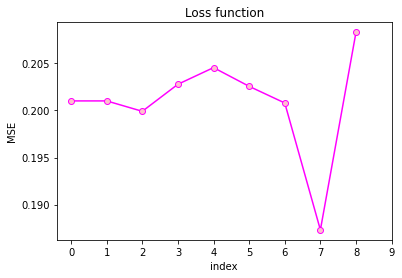

In [ ]:
plt.plot(loss, color='magenta', marker='o',mfc='pink' ) 
plt.xticks(range(0,len(loss)+1, 1))

plt.ylabel('MSE') 
plt.xlabel('index') 
plt.title("Loss function") 
plt.show() 

## training curve

In [ ]:
X_test = df9.iloc[:, 0:14]
y_test = df9.iloc[:, -1]
acc = []
loss = []
size = []
for x in range (9):
  df_train = df[0 : len_new_dataframe*(x+1)]
  X_train = df_train.iloc[ : , 0:14]
  y_train = df_train.iloc[:, -1]
  dt_default = DecisionTreeClassifier(criterion='entropy')
  dt_default.fit(X_train,y_train)
  y_pred_default = dt_default.predict(X_test)
  print("data for train dataset {}".format(x))
  print("classification_report", "\n",classification_report(y_test,y_pred_default))
  print("confusion_matrix :",confusion_matrix(y_test,y_pred_default))
  accuracy = accuracy_score(y_test,y_pred_default)
  print("acuuracy:",accuracy)
  mse = MSE(y_test,y_pred_default)
  print("loss:",mse)
  size.append(len(df_train))
  acc.append(accuracy)
  loss.append(mse)

data for train dataset 0
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      3371
           1       0.60      0.61      0.60      1151

    accuracy                           0.80      4522
   macro avg       0.73      0.74      0.73      4522
weighted avg       0.80      0.80      0.80      4522

confusion_matrix : [[2895  476]
 [ 447  704]]
acuuracy: 0.7958867757629368
loss: 0.20411322423706324
data for train dataset 1
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3371
           1       0.62      0.63      0.62      1151

    accuracy                           0.81      4522
   macro avg       0.75      0.75      0.75      4522
weighted avg       0.81      0.81      0.81      4522

confusion_matrix : [[2929  442]
 [ 429  722]]
acuuracy: 0.8073861123396727
loss: 0.19261388766032728
data for train dataset 2
classification_report

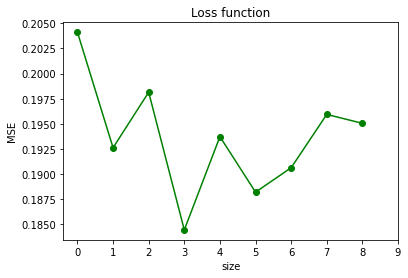

In [ ]:
plt.plot(loss ,color='green', marker='o',mfc='green' ) 
plt.xticks(range(0,len(loss)+1, 1))

plt.ylabel('MSE') 
plt.xlabel('size') 
plt.title("Loss function") 
plt.show() 

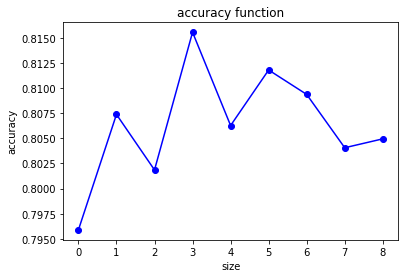

In [ ]:
plt.plot(acc ,color='blue', marker='o',mfc='blue' ) 
plt.ylabel('accuracy') 
plt.xlabel('size') 
plt.title("accuracy function") 
plt.show() 

## Pruning

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

In [ ]:
df_train = df[0 : len_new_dataframe*9]
x_train = df_train.iloc[ : , 0:14]
y_train = df_train.iloc[:, -1]
clf.fit(x_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
max_depth = clf.tree_.max_depth
print(clf.tree_.max_depth)

54


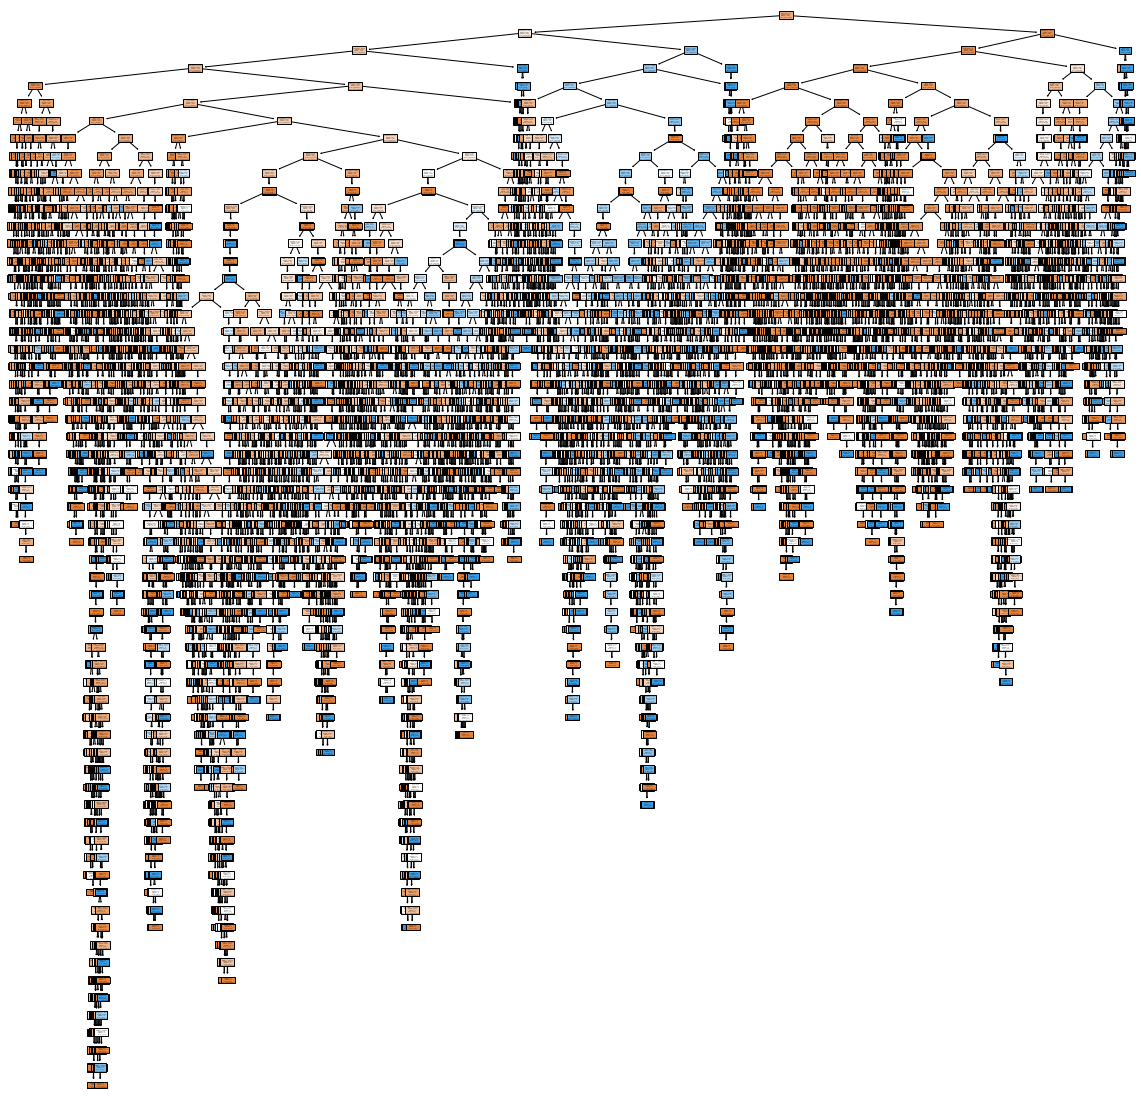

In [ ]:
plt.figure(figsize=(20,20))
features = df_train.columns
classes = ['>=50','<50']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
df_train = df[0 : len_new_dataframe*9]
x_train = df_train.iloc[ : , 0:14]
y_train = df_train.iloc[:, -1]
acc = []
loss = []
for depth in range(1, max_depth):
  DT = DecisionTreeClassifier(criterion='entropy', max_depth = depth)
  DT.fit(x_train,y_train)
  y_pred = DT.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  mse = MSE(y_test,y_pred)
  acc.append(accuracy)
  loss.append(mse)

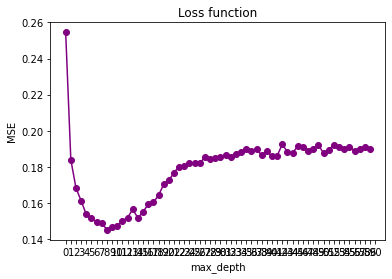

In [ ]:
plt.plot(loss ,color='purple', marker='o',mfc='purple' ) 
plt.xticks(range(0,len(loss)+1, 1))

plt.ylabel('MSE') 
plt.xlabel('max_depth') 
plt.title("Loss function") 
plt.show() 

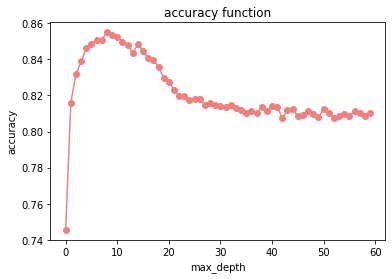

In [ ]:
plt.plot(acc ,color='lightcoral', marker='o',mfc='lightcoral' ) 
plt.ylabel('accuracy') 
plt.xlabel('max_depth') 
plt.title("accuracy function") 
plt.show() 

In [ ]:
min_loss = min(loss)
max_accuracy = max(acc)
print(min_loss, max_accuracy)
print(loss.index(min_loss), acc.index(max_accuracy))

0.1450685537372844 0.8549314462627157
8 8


In [ ]:
DT_8 = DecisionTreeClassifier(criterion='entropy', max_depth = 8)

In [ ]:
df_train = df[0 : len_new_dataframe*9]
x_train = df_train.iloc[ : , 0:14]
y_train = df_train.iloc[:, -1]
DT_8.fit(x_train,y_train)
y_pred = DT_8.predict(X_test)

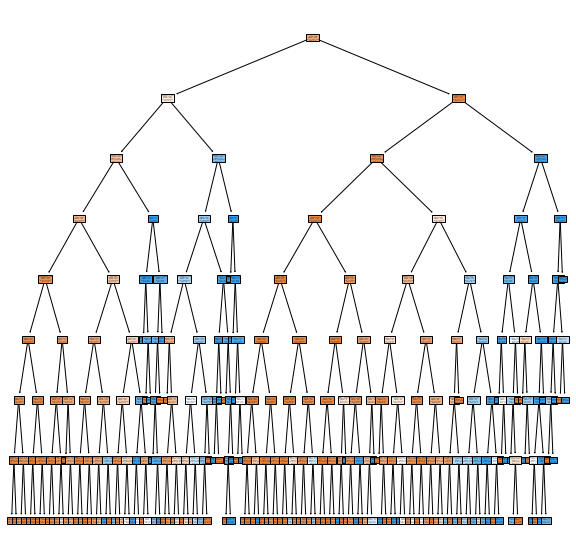

In [ ]:
plt.figure(figsize=(10,10))
features = df_train.columns
classes = ['>=50','<50']
tree.plot_tree(DT_8,feature_names=features,class_names=classes,filled=True)
plt.show()

## pruning and size

In [ ]:
X_test = df9.iloc[:, 0:14]
y_test = df9.iloc[:, -1]
acc = []
loss = []
size = []
for x in range (9):
  df_train = df[0 : len_new_dataframe*(x+1)]
  X_train = df_train.iloc[ : , 0:14]
  y_train = df_train.iloc[:, -1]
  dt_default = DecisionTreeClassifier(criterion='entropy', max_depth = 8)
  dt_default.fit(X_train,y_train)
  y_pred_default = dt_default.predict(X_test)
  print("data for train dataset {}".format(x))
  print("classification_report", "\n",classification_report(y_test,y_pred_default))
  print("confusion_matrix :",confusion_matrix(y_test,y_pred_default))
  accuracy = accuracy_score(y_test,y_pred_default)
  print("acuuracy:",accuracy)
  mse = MSE(y_test,y_pred_default)
  print("loss:",mse)
  size.append(len(df_train))
  acc.append(accuracy)
  loss.append(mse)

data for train dataset 0
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3371
           1       0.72      0.56      0.63      1151

    accuracy                           0.83      4522
   macro avg       0.79      0.74      0.76      4522
weighted avg       0.82      0.83      0.82      4522

confusion_matrix : [[3118  253]
 [ 512  639]]
acuuracy: 0.8308270676691729
loss: 0.16917293233082706
data for train dataset 1
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      3371
           1       0.81      0.53      0.64      1151

    accuracy                           0.85      4522
   macro avg       0.83      0.74      0.77      4522
weighted avg       0.85      0.85      0.84      4522

confusion_matrix : [[3229  142]
 [ 540  611]]
acuuracy: 0.8491817779743477
loss: 0.15081822202565237
data for train dataset 2
classification_report

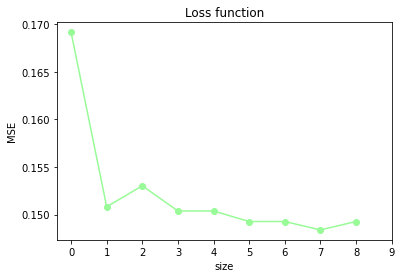

In [ ]:
plt.plot(loss ,color='palegreen', marker='o',mfc='palegreen' ) 
plt.xticks(range(0,len(loss)+1, 1))

plt.ylabel('MSE') 
plt.xlabel('size') 
plt.title("Loss function") 
plt.show() 

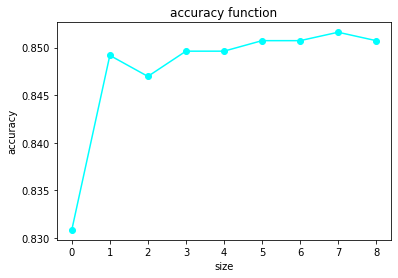

In [ ]:
plt.plot(acc ,color='aqua', marker='o',mfc='aqua' ) 
plt.ylabel('accuracy') 
plt.xlabel('size') 
plt.title("accuracy function") 
plt.show() 

## splitter = Random

In [ ]:
DT_random = DecisionTreeClassifier( splitter = 'random', max_depth = 8)

In [ ]:
df_train = df[0 : len_new_dataframe*9]
x_train = df_train.iloc[ : , 0:14]
y_train = df_train.iloc[:, -1]
DT_random.fit(x_train,y_train)
y_pred = DT_random.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("acuuracy:",accuracy)
mse = MSE(y_test,y_pred)
print("loss:",mse)

acuuracy: 0.8246351172047767
loss: 0.17536488279522336


## Gain ratio

In [15]:
DT_GI = DecisionTreeClassifier( criterion='gini', max_depth = 8)

In [16]:
df_train = df[0 : len_new_dataframe*9]
x_train = df_train.iloc[ : , 0:14]
y_train = df_train.iloc[:, -1]
DT_GI.fit(x_train,y_train)
y_pred = DT_GI.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("acuuracy:",accuracy)
mse = MSE(y_test,y_pred)
print("loss:",mse)

acuuracy: 0.8538257408226448
loss: 0.14617425917735516
